# Visualización con Pandas y Seaborn
**Autor:** José A. Troyano    &nbsp;&nbsp;&nbsp; **Última modificación:** 22/02/2023

------------------------------------------------------
## Contenido

1. <a href="#pandas"> Visualización con Pandas </a> <br>
2. <a href="#seaborn"> Visualización con Seaborn  </a> <br>
    2.1 <a href="#distribucion_continuo"> Distribución de atributos continuos  </a> <br>
    2.2 <a href="#frecuencia_discreto"> Fecuencia de atributos discretos  </a> <br>
    2.3 <a href="#media_continuo_discreto"> Media de un atributo continuo en función de atributos discretos  </a> <br>
    2.4 <a href="#distribucion_continuo_discreto"> Distribución de un atributo continuo en función de atributos discretos  </a> <br>
3. <a href="#fechas"> Gráficas basadas en fechas con Pandas y Seaborn  </a> <br>
4. <a href="#especificos"> Gráficas con paquetes específicos  </a> <br>
    4.1. <a href="#joy_plots"> _Joy plots_  </a> <br>
    4.2. <a href="#treemaps"> _Treemaps_  </a> <br>
    4.3. <a href="#autocorrelation"> _Autocorrelation plots_  </a> <br>
    4.4. <a href="#descomposicion"> Descomposición de series temporales  </a> <br>
    4.5. <a href="#dendrogramas"> Dendrogramas  </a> <br>
    4.6. <a href="#calendar"> _Calendar maps_  </a> <br>
    4.7. <a href="#sankey"> _Sankey diagrams_ </a> <br>
    4.8. <a href="#chord"> _Chord diagrams_ </a> <br>
    4.9. <a href="#polares"> Gráficas polares </a> <br>
5. <a href="#matrices"> Matrices de gráficas con Seaborn  </a> <br> 
------------------------------------------------------

La herramienta de referencia de visualización en Python es Matplotlib (https://matplotlib.org/#). Matplotlib es un paquete muy potente, pero a su vez muy complejo, con muchísimas clases y métodos que permiten construir gráficas muy sofisticadas. En este notebook usaremos Matplotlip a través de dos _wrappers_ (proporcionados por Pandas y Seaborn) que nos ayudan a generar gráficas de una forma más sencilla e intuitiva. 

Uno de los principales usos que se suele hacer de la visualización es el análisis exploratorio de los datos. Mediante este análisis se pretende descubrir las distribuciones de los atributos, y las posibles interacciones entre atributos. La siguiente gráfica muestra un catálogo básico de diagramas para este tipo de análisis:

![title](img/analisis_exploratorio.png)

Solo veremos algunas de las posibilidades que estas dos herramientas ofrecen. En internet se pueden encontrar muy buenos tutoriales con este tipo de gráficas _en acción_ para hacer lo que se denomina análisis exploratorio sobre datasets concretos. He aquí algunos de muestra:
- A Very Extensive Exploratory Analysis in Python: https://www.kaggle.com/agzamovr/a-very-extensive-exploratory-analysis-in-python
- Visualize World Trends using Seaborn in Python: https://towardsdatascience.com/visualize-world-trends-using-seaborn-in-python-2e563e7d35da
- Dataset exploration. Boston house pricing: http://www.neural.cz/dataset-exploration-boston-house-pricing.html
- The Master Plots: https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/
- The Python Graph Gallery: https://python-graph-gallery.com/
- Tutorial introductorio sobre Matplotlib: https://observablehq.com/collection/@observablehq/plot-for-matplotlib-users

![title](img/matplotlib_cheatsheet.png)

Aparte de la posibilidad de generar nosotros las gráficas para el análisis exploratorio, también se puede recurrir a herramientas que permiten analizar de forma interactiva un conjunto de datos. Como, por ejemplo, https://github.com/Kanaries/pygwalker:

![title](img/pygwalker.png)


Empezaremos por la importación de Pandas, Seaborn y Matplotlib, y la instrucción <code>%matplotlib inline</code> que permite renderizar las gráficas en el notebook:

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from scipy.spatial import distance_matrix
from sklearn.preprocessing import MinMaxScaler

# Para no mostrar 'Future Warnings' producto de que algunos paquetes aún
# trabajan con versiones no actualizadas de otros paquetes
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

C:\Users\valle\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


En la mayor parte de las secciones de este notebook trabajaremos sobre el dataset bike. La siguiente imagen muestra los atributos y las primeras filas del dataset:

![title](img/dataset.png)

Con las siguientes instrucciones lo leeremos y generaremos algunos atributos categóricos (discretizando atributos continuos) que utilizaremos en algunas gráficas:

In [2]:
# Lectura del dataset bike
DATOS_BIKE = pd.read_csv('./train-bike.csv', parse_dates=['datetime'])
DATOS_BIKE['temp_level'] = pd.cut(DATOS_BIKE['temp'], bins=[0,15,30,np.inf], labels=['T1', 'T2', 'T3'])
DATOS_BIKE['wind_level'] = pd.cut(DATOS_BIKE['windspeed'], bins=[0,15,30,45,np.inf], labels=['W1', 'W2', 'W3', 'W4'])
DATOS_BIKE['usage'] =  pd.cut(DATOS_BIKE['count'], bins=[0,20,200,np.inf], labels=['LOW', 'MEDIUM', 'HIGH'])
print(DATOS_BIKE.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  temp_level  10886 non-null  category      
 13  wind_level  9573 non-null   category      
 14  usage       10886 non-null  category      
dtypes: category(3), datetime64[ns](1), float64(3), int64(8)
memory usage: 

## 1. Visualización con Pandas <a name="pandas"> </a>

Las series y dataframes de Pandas ofrecen varios métodos (el más importante de ellos es <code>plot</code>) que se apoyan en métodos de Matplotlib para generar distintos tipos de gráficas.

Links interesantes:
- Pandas user guide: https://pandas.pydata.org/docs/user_guide/visualization.html
- Python Graph Gallery: https://python-graph-gallery.com/

En la siguiente figrura se muestran las gráficas que obtendremos en los ejercicios de esta sección:

![title](img/pandas.png)

<Axes: >

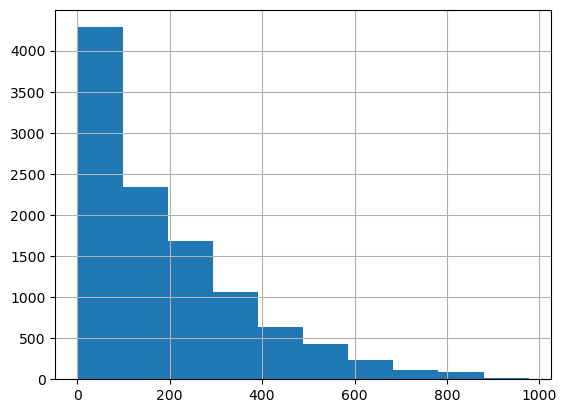

In [3]:
# EJERCICIO: histograma con los valores del atributo 'count'
DATOS_BIKE['count'].hist()

#DATOS_BIKE['count'].plot(kind='hist')

<Axes: ylabel='count'>

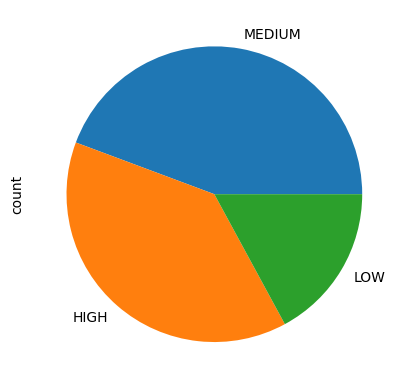

In [4]:
# EJERCICIO: diagrama de tarta con la distribución de valores del atributo 'usage'
DATOS_BIKE['usage'].value_counts().plot.pie()

#DATOS_BIKE['usage'].value_counts().plot(kind='pie')

<Axes: xlabel='temp', ylabel='humidity'>

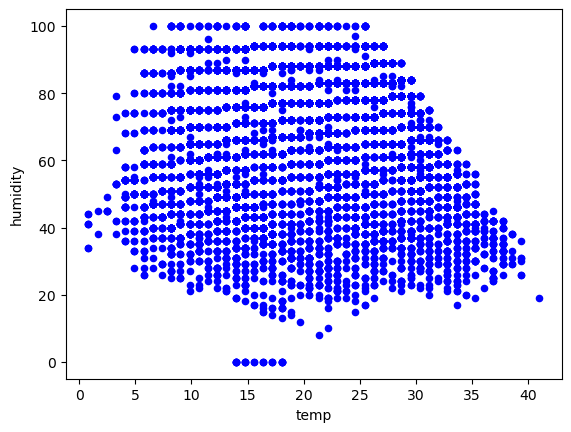

In [5]:
# EJERCICIO: diagrama de puntos para mostar la distribución de 'temp' y 'humidity'
DATOS_BIKE.plot.scatter(x='temp',y='humidity', color='blue')

#DATOS_BIKE.plot(kind='scatter', x='temp',y='humidity', color='blue')

<Axes: xlabel='temp', ylabel='humidity'>

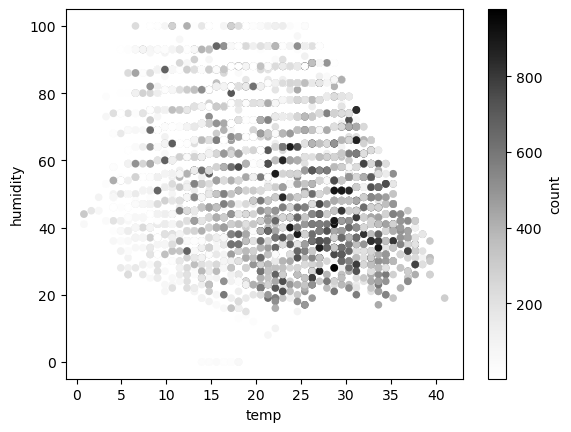

In [6]:
# EJERCICIO: diagrama de puntos para mostar la distribución de 'temp' y 'humidity' usando 'count' para la intensidad de color
DATOS_BIKE.plot.scatter(x='temp',y='humidity', c='count')

<Axes: xlabel='temp', ylabel='humidity'>

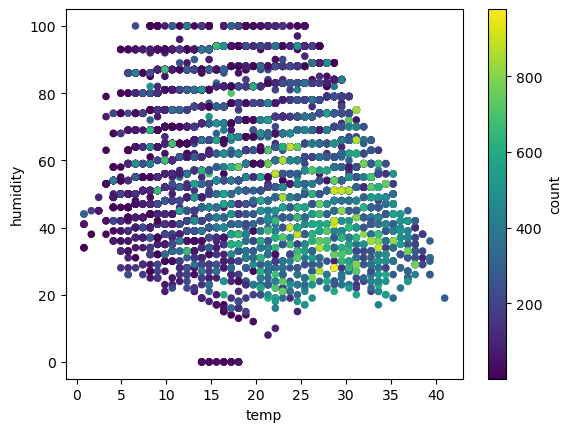

In [8]:
# EJERCICIO: repetir el ejercicio anterior cambiando la escala de colores

DATOS_BIKE.plot(kind='scatter',x='temp',y='humidity', c='count', colormap='viridis')

<Axes: xlabel='temp', ylabel='humidity'>

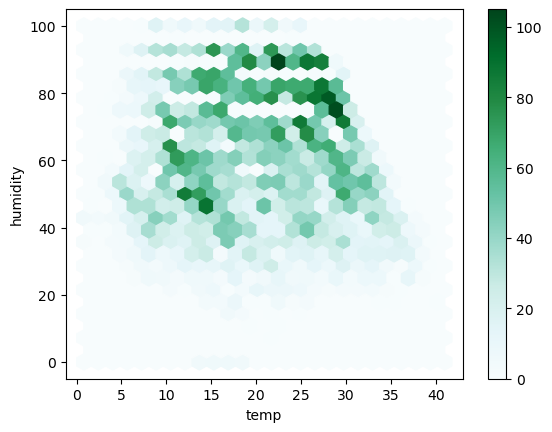

In [9]:
# EJERCICIO: diagrama de celdas para mostrar la distribución de 'temp' y 'humidity'. Probar varios tamaños de celda.
DATOS_BIKE.plot(kind='hexbin', x='temp', y='humidity', gridsize=25)
#DATOS_BIKE.plot(kind='hexbin', x='temp', y='humidity', gridsize=80)

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/61/11/1812ef6cbd7433ad240f72161ce5f84c4c450cede4db080365d371d29117/pandas-2.2.1-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB 1.3 MB/s eta 0:00:10
   ---------------------------------------- 0.1/11.6 MB 2.1 MB/s eta 0:00:06
   - -------------------------------------- 0.4/11.6 MB 3.4 MB/s eta 0:00:04
   -- ------------------------------------- 0.7/11.6 MB 4.3 MB/s eta 0:00:03
   --- ------------------------------------ 1.0/11.6 MB 4.7 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/11.6 MB 5.2 MB/s eta 0:00:02
   ----- ---------------------------------- 1.6/11.6 MB 5.2 MB/s eta 0:00:02
   ------ --------------------------------- 1.9/11.6 MB 5.4 MB/s eta 0:00:02
   ------- -------------------

AttributeError: PolyCollection.set() got an unexpected keyword argument 'c'

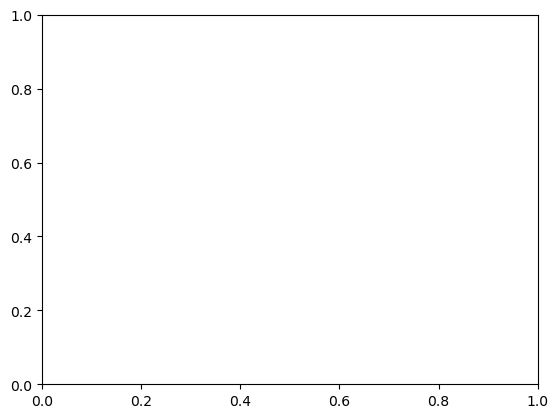

In [15]:
# EJERCICIO: repetir el ejercicio anterior usando distintas funciones de agregación para determinar la intensidad de color:
#   - Función 'len' sobre 'count' para reproducir el gráfico anterior
#   - Distintas funciones matemáticas sobre el atributo 'count'

len_count = len(DATOS_BIKE['count'])

DATOS_BIKE.plot(kind='hexbin', x='temp', y='humidity', gridsize=25, c=len_count)


## 2. Visualización con Seaborn <a name="seaborn"> </a>

Seaborn es una herramienta de visualización que facilta mucho la generación de gráficas sobre Matplotlib. Tiene una muy buena documentación en la que, mediante una galería de imágenes, podemos identificar la imagen que nos interesa junto al fragmento de código necesario para generarla.

Solo veremos algunas de las gráficas que incluye Matplotlib, y las agruparemos en secciones según el tipo de análisis que nos permitan hacer.

### 2.1 Distribución de atributos continuos <a name="distribucion_continuo"> </a>

Muestran el histograma y la estimación KDE de la distribución de probabilidad de uno o dos atributos continuos. KDE (_Kernel Density Estimation_) es una técnica no paramétrica para estimar una distribución de probabilidad a partir de una muestra finita de datos. 

En la siguiente figrura se muestran las gráficas que obtendremos en los ejercicios de esta sección:

![title](img/distribucion_continuos.png)

<Axes: xlabel='temp', ylabel='Count'>

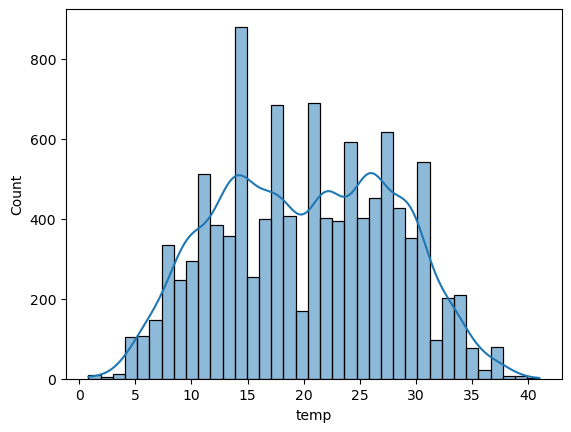

In [16]:
# EJERCICIO: diagrama con histograma y estimación KDE de la distribución de probabilidad del atributo 'temp'
sns.histplot(DATOS_BIKE['temp'], kde=True)

<Axes: xlabel='temp', ylabel='Count'>

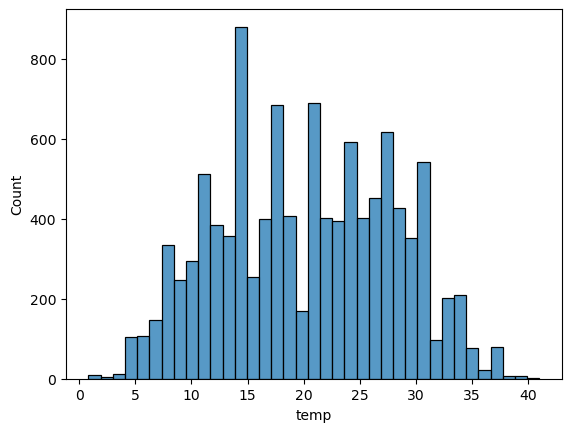

In [17]:
# EJERCICIO: repetir el ejercicio anterior mostrando solo el histograma
# sns.histplot(DATOS_BIKE, x='temp')

sns.histplot(DATOS_BIKE['temp'])

<Axes: xlabel='temp', ylabel='Density'>

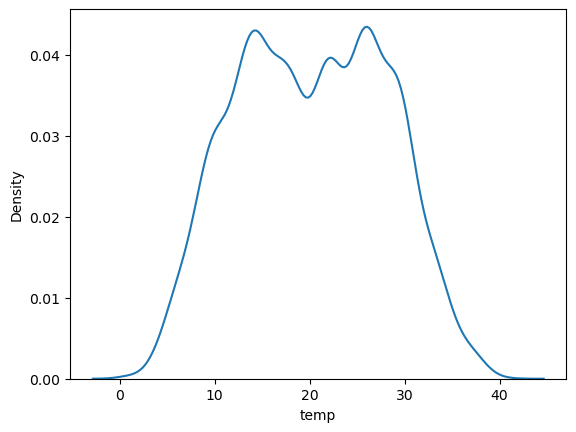

In [18]:
# EJERCICIO: repetir el ejercicio anterior mostrando solo la estimación de la distribución KDE
sns.kdeplot(data=DATOS_BIKE, x='temp')

<Axes: xlabel='temp', ylabel='Density'>

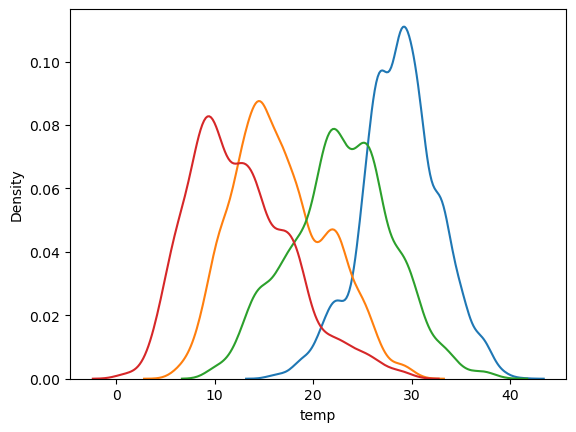

In [19]:
# EJERCICIO: 
#    - Calcular las series de 'temp' según season (1: primavera, 2:verano, 3:otoño, 4: invierno)
#    - Mostrar mostrar las cuatro distribuciones de probabilidad en un mismo diagrama

temp_primavera = DATOS_BIKE[DATOS_BIKE['season']==1]['temp']
temp_verano = DATOS_BIKE[DATOS_BIKE['season']==2].temp
temp_otoño = DATOS_BIKE[DATOS_BIKE['season']==3].temp
temp_invierno = DATOS_BIKE[DATOS_BIKE['season']==4].temp

sns.kdeplot(temp_otoño, label='otoño')
sns.kdeplot(temp_invierno, label='invierno')
sns.kdeplot(temp_verano, label='verano')
sns.kdeplot(temp_primavera, label='primavera')

<AxesSubplot:xlabel='temp', ylabel='humidity'>

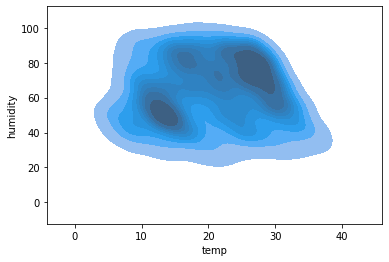

In [35]:
# EJERCICIO: diagrama 2D con la distribución KDE para dos atributos: 'temp' y 'humidity'
sns.kdeplot(x=DATOS_BIKE['temp'], y=DATOS_BIKE['humidity'], fill=True)

### 2.2 Frecuencia de atributos discretos <a name="frecuencia_discreto"> </a>

Muestran la frecuencia de aparición de cada uno de los valores del atributo discreto. 

En la siguiente figrura se muestran las gráficas que obtendremos en los ejercicios de esta sección:

![title](img/frecuencia_discretos.png)

<Axes: xlabel='usage', ylabel='count'>

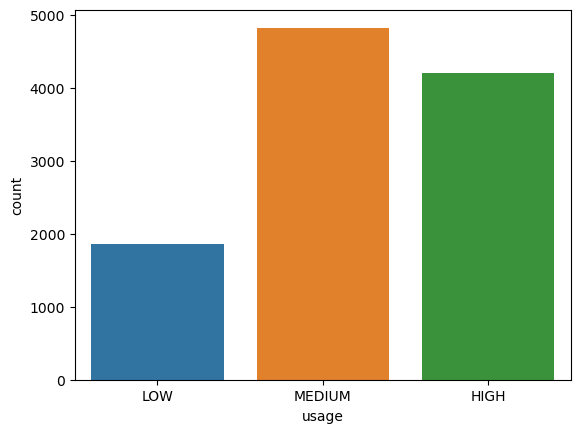

In [20]:
# EJERCICIO: diagrama de barras para el atributo discreto 'usage'
sns.countplot(data=DATOS_BIKE, x='usage')

<Axes: xlabel='usage', ylabel='count'>

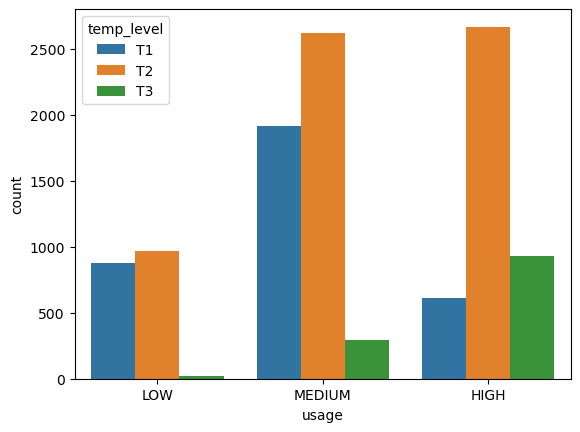

In [21]:
# EJERCICIO: diagrama de barras para el atributo 'usage' detallado según el atributo 'temp_level'
sns.countplot(data=DATOS_BIKE, x='usage', hue='temp_level')

<Axes: xlabel='season', ylabel='temp_level'>

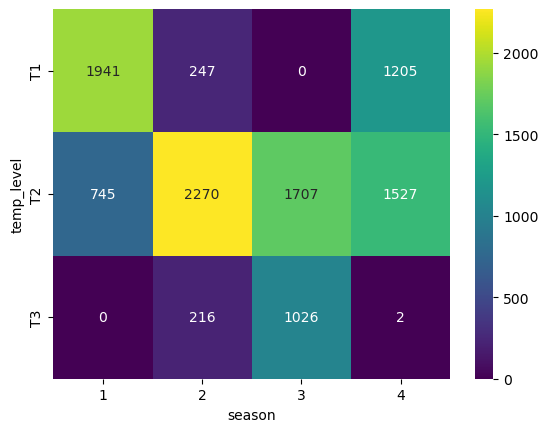

In [22]:
# EJERCICIO: 
#    - Crear una tabla de contingencia con la frecuencia de cada posible pareja de valores de atributos 'temp_level' y 'season'
#    - Generar un mapa de calor a partir de la anterior tabla de contingencia

frecuencias = pd.crosstab(index=DATOS_BIKE['temp_level'],
                         columns=DATOS_BIKE['season'])
sns.heatmap(frecuencias, annot=True, fmt='d',
           cmap='viridis')

### 2.3 Media de un atributo continuo en función de atributos discretos <a name="media_continuo_discreto"> </a>

Gráficas que muestran la media de un atributo continuo en función los valores de atributos discretos. Podrían adaptarse para mostrar otro indicador.

En la siguiente figrura se muestran las gráficas que obtendremos en los ejercicios de esta sección:

![title](img/media_continuo_discretos.png)

<Axes: xlabel='count', ylabel='count'>

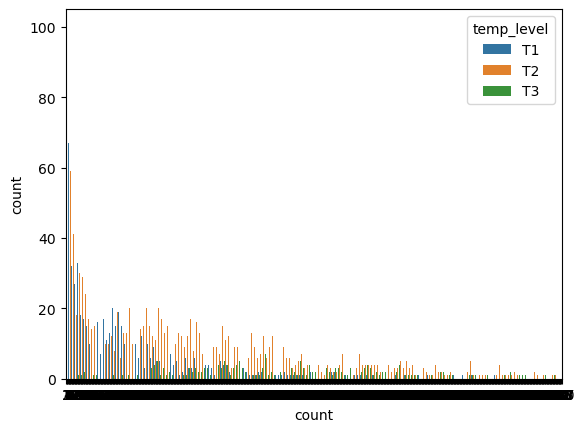

In [32]:
# EJERCICIO: diagrama de barras en el que se muestre la media de 'count' detallada según el atributo 'temp_level'
count_mean = DATOS_BIKE['count'].mean()
sns.countplot(data=DATOS_BIKE, x='count', hue='temp_level')

In [31]:
# EJERCICIO: repetir el ejercicio anterior detallando por 'temp_level' y 'wind_level'
sns.countplot(data=DATOS_BIKE, x='count', hue=[['temp_level', 'wind_level']])

TypeError: unhashable type: 'list'

In [ ]:
# EJERCICIO: 
#    - Crear una tabla pivote con la media de 'count' para cada posible pareja de valores de atributos 'temp_level' y 'wind_level'
#    - Generar un mapa de calor a partir de la anterior tabla pivot


### 2.4 Distribución de un atributo continuo en función de atributos discretos <a name="distribucion_continuo_discreto"> </a>

Gráficas que muestran la distribución de un atributo continuo en función los valores de atributos discretos.

En la siguiente figrura se muestran las gráficas que obtendremos en los ejercicios de esta sección:

![title](img/distribucion_continuo_discretos.png)

In [ ]:
# EJERCICIO: diagrama de cuerdas para el atributo 'count' detallado según el atributo 'temp_level'


In [ ]:
# EJERCICIO: repetir el ejercicio anterior moviendo aleatoriamente los puntos para desvelar el grado de solapamiento


In [ ]:
# EJERCICIO: diagrama de cajas para el atributo 'count' detallado según el atributo 'temp_level'


In [ ]:
# EJERCICIO: diagrama de violin para el atributo 'count' detallado según el atributo 'temp_level'


In [ ]:
# EJERCICIO: repetir el ejercicio anterior dedicando cada parte del violín a uno de los dos valores del atributo 'holiday'


## 3. Gráficas basadas en fechas con Pandas y Seaborn <a name="fechas"> </a>

En muchos datasets podemos encontarnos con datos correspondientes a fechas u horas. En esta sección veremos algunas gráficas simples generadas con Pandas y Seborn sobre a partir de este tipo de información. Lo haremos sobre la columna <code>datetime</code> del dataset bike. 

En la siguiente figrura se muestran las gráficas que obtendremos en los ejercicios de esta sección:

![title](img/fechas.png)

In [ ]:
# EJERCICIO: gráfica con la evolución temporal de 'count'. Cada punto de la gráfica se corresponderá con el 
#            total de bicicletas alquiladas en un determinado día. Habrá que, por tanto, agrupar el dataframe por días.


In [ ]:
# EJERCICIO: gráfica 'más suave' que la anterior mostrando la media móvil calculada sobre una ventana de 10


In [ ]:
# EJERCICIO: gráfica con el patrón horario de las columnas 'casual' y 'registered'. Cada punto de la gráfica 
#            se corresponderá con el total de bicicletas alquiladas en cada hora. Habrá que, por tanto, agrupar 
#            el dataframe por horas.


In [ ]:
# EJERCICIO: gráfica con el patrón semanal de las columnas 'casual' y 'registered'. Cada punto de la gráfica
#            se corresponderá con el total de bicicletas alquiladas en un día de la semana (lunes, martes, ...). 
#            Habrá que, por tanto, agrupar el dataframe por día de la semana.


In [ ]:
# EJERCICIO: generar un mapa de calor en el que se crucen los patrones de uso horario y día de la semana del atributo 'count'.
#            Cada celda del mapa se corresponderá con la media de bicicletas alquiladas en una determinada hora y día
#            de la semana. No hará falta hacer uso de la agrupación, los valores medios se podrán calcular con una tabla pivot.


## 4. Gráficas con paquetes específicos <a name="especificos"> </a>

En esta sección veremos algunas gráficas que se construyen con paquetes más específicos que <code>Pandas</code> y <code>Seaborn</code>. Algunos de estos paquetes están especializados en un solo tipo de gráficas. Aun así, son alternativas útiles a la hora de destacar aspectos interesantes de un dataset.

En la siguiente figrura se muestran las gráficas que obtendremos en los ejercicios de esta sección:

![title](img/otras_herramientas.png)

### 4.1. _Joy plots_ <a name="joy_plots"> </a>
Los _joy plots_ son una serie de histogramas, o también de _density plots_, que se alinean en el eje horizontal y que pueden estar solapados. Permiten comparar las distribuciones que toma un atributo continuo (sobre las que se construye el hisograma) en función de un atributo discreto. Se construyen tantos histogramas (o _density plots_) como valores posibles tenga el atributo discreto.



Están implementados en el paquete <code>joypy</code>. No está incluido en <code>Anaconda</code>, por lo que para poder usarlo deberemos instalarlo con la siguiente instrucción desde <code>Anaconda prompt</code>:

             pip install joypy
    
Y después necesitamos importar el paquete:

In [ ]:
import joypy

In [ ]:
# EJERCICIO: generar un joyplot que muestre un diagrama KDE con la distribución del atributo 'count' para 
#            cada día de la semana. Cada KDE deberá estar etiquetado con el nombre del día.


In [ ]:
# EJERCICIO: repetir el ejercicio mostrando en cada KDE las distribuciones de 'casual' y 'registered' 


### 4.2. _Treemaps_ <a name="treemaps"> </a>

Los _treemaps_ cumplen una función similar a los diagramas de tarta ya que están orientados a mostrar mediante una proporción de áreas la relación entre las frecuencias de los valores para un atributo discreto. A diferencia de los diagramas de tarta, dan una idea intuitiva de las proporciones de los valores menos frecuentes del atributo. 


Están implementados en el paquete <code>squarify</code>. No está incluido en <code>Anaconda</code>, por lo que para poder usarlo deberemos instalarlo con la siguiente instrucción desde <code>Anaconda prompt</code>:

           pip install squarify
           
Y después necesitamos importar el paquete:

In [ ]:
import squarify

In [ ]:
# Antes de empezar definiremos un nuevo atributo discreto con varios niveles
umbrales = [0,100,200,300,400,500,600,700,800,900,np.inf]
nombres = ['LEVEL-0', 'LEVEL-1', 'LEVEL-2','LEVEL-3', 'LEVEL-4', 'LEVEL-5', 'LEVEL-6','LEVEL-7', 'LEVEL-8', 'LEVEL-9']
DATOS_BIKE['fine_grained_usage'] =  pd.cut(DATOS_BIKE['count'], bins=umbrales, labels=nombres)

In [ ]:
# EJERCICIO: generar un treemap para el atributo 'fine_grained_usage'


In [ ]:
# EJERCICIO: repetir el ejercicio anterior usando la escala de colores verdes.
# NOTA: hará falta importar matplitlib para usar sus funciones 'Normalize' y 'Greens'


### 4.3 _Autocorrelation plots_ <a name="autocorrelation"> </a>

Los gráficos de autocorrelación muestran la relación que hay entre los valores de una serie temporal y los valores anteriores. Se calcula un grado de autocorrelación para distintos valores de retrasos (_lags_) que se corresponden con los saltos hacia atrás en la serie. Por ejemplo, el grado de autocorrelación para el _lag_ 1 mide la capacidad predictiva del valor anterior de la serie, para el _lag_ 2 mediría la capacidad predictiva del segundo valor anterior, y así sucesivamente.
La autocorrelación parcial para un determinado _lag k_ mide la capacidad predictiva de todos los valores intermedios hasta el k-ésimo anterior.

El valor máximo de la correlación es 1 y, en las gráficas, se consideran significativos aquellos _lags_ que quedan fuera de la zona sombreada en azul.

Están implementados en el paquete <code>statsmodels</code> que está incluido en <code>Anaconda</code>, por lo que solo tendremos que importarlas:

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Trabajaremos sobre la serie temporal proporcionada por el atributo <code>count</code> que tiene cierto componente periódico como se puede observar en los puntos del primer mes del dataset:

In [ ]:
DATOS_BIKE[DATOS_BIKE['datetime'] < pd.to_datetime('31-01-2011', format='%d-%m-%Y')]['count'].plot()

In [ ]:
# EJERCICIO: calcular el gráfico de autocorrelación para el atributo 'count' y los 100 primeros lags


In [ ]:
# EJERCICIO: calcular el gráfico de autocorrelación parcial para el atributo 'count' y los 100 primeros lags


### 4.4. Descomposición de series temporales <a name="descomposicion"> </a>

La descomposición de series consiste en identificar los componentes de una serie temporal. Habitualmente se definen estas tres componentes:
- **tendencia**: base de la serie, que captura la propensión de subidas o bajadas
- **estacionalidad**: componente cíclica y repetitiva
- **residuo**: componente aleatoria en la serie

Existen muchas soluciones para realizar la descomposición de series. Nosostros usaremos una implementación simple incluida en <code>statsmodels</code>. Los dos parámetros más interesantes para nuestro ejemplo son:
- **freq**: frecuencia de los ciclos, nosotros usaremos 24x7 correspondientes a las 24 horas de los 7 días de la semana.
- **model**: puede ser <code>'additive'</code> (si las tres componentes se suman) o <code>'multiplicative'</code> (si se multiplican)

Importaremos la implementación de la siguiente forma:

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

Con las siguientes instrucciones obtendremos una serie con los valores del atributo <code>count</code> y cuyo índice son las fechas correspondientes. Este tipo de series es el que necesita la función <code>seasonal_decompose</code>:

In [ ]:
serie = DATOS_BIKE['count']
serie.index = DATOS_BIKE['datetime']

In [ ]:
# EJERCICIO: calcular la descomposición temporal de la serie anterior


### 4.5. Dendrogramas <a name="dendrogramas"> </a>

Un dendrograma (del griego δένδρον, déndron, 'árbol') es una representación que organiza un conjunto de puntos en subcategorías en función de una métrica de similitud. Con un dendrograma se puede observar las relaciones de agrupación entre los datos y entre grupos de datos.

Usaremos una implementación simple disponible en <code>scipy</code>. El paquete <code>scipy</code> está incluido en <code>Anaconda</code>, por lo que solo tendremos que importarlo:

In [ ]:
import scipy.cluster.hierarchy as shc

Generaremos un dendrograma que muestre la relación de parecido entre los días de la semana en función de la media de bicicletas alquiladas para cada día (del total, de los usarios registrados y de los casuales). En el primer ejercicio construiremos un dataframe denominado <code>datos_agrupados</code> que posteriormente nos servirá para generar el dendrograma: 

In [ ]:
# EJERCICIO: construir el dataframe 'datos_agrupados' a partir de los datos originales de bike con las sigientes características:
#    - Una columna 'day' con el nombre del día de la semana. El dataframe tendrá solo siete filas (una por cada día)
#    - Una columna 'count' con las medias (para cada día) de bicletas alquiladas en total
#    - Una columna 'registered' con las medias (para cada día) de bicletas alquiladas por usarios registrados
#    - Una columna 'casual' con las medias (para cada día) de bicletas alquiladas por usarios casuales


In [ ]:
# EJERCICIO: generar un dendrograma a partir del dataframe 'datos_agrupados'


### 4.6. _Calendar heatmaps_ <a name="calendar"> </a>

Los _calendar heatmaps_ son unos diagramas que aplican la idea de los _heatmaps_ a datos indexados temporalmente. Se organizan en cuadrículas en las que el eje _x_ se dedica a los meses, y el eje _y_ a los días. 

En este ejercicio usaremos la implementación disponible en el paquete <code>calmap</code>. Este paquete no está incluido en <code>Anaconda</code>, por lo que para poder usarlo deberemos instalarlo con la siguiente instrucción desde <code>Anaconda prompt</code>:

           pip install calmap
           
Y después necesitamos importar el paquete:

In [ ]:
import calmap

Generaremos un diagrama que muestre la demanda del atributo a través de la media del atributo <code>count</code> por cada día de los años disponibles en el dataset. En el primer ejercicio construiremos un dataframe denominado <code>datos_agrupados</code> que posteriormente nos servirá para generar el _calmap_: 

In [ ]:
# EJERCICIO: construir el dataframe 'datos_agrupados' a partir de los datos originales de bike con las sigientes características:
#    - Una columna 'date' con las fechas (sin la información horaria) de cada registro. Usaremos esta fecha para agrupar
#      y calcular las medías de cada día
#    - Una columna 'count' con las medias (para cada día de los presentes en el dataset) de bicletas alquiladas en total
#    - El índice del dataframe debe ser del tipo 'datetime'. Este tipo de índices se construye con la función
#      'DatetimeIndex' disponible en pandas


In [ ]:
# EJERCICIO: generar un calendar heatmap a partir del dataframe 'datos_agrupados'


### 4.7. _Sankey diagrams_ <a name="sankey"> </a>

El diagrama de Sankey es un tipo de diagrama basado en flujos, en el que la anchura de las flechas es proporcional a la información que se pretende representar. Es muy útil, por ejemplo, para visualizar matrices de confusión resultantes de la evaluación de un clasificador.

En este ejercicio usaremos la implementación disponible en el paquete <code>pySankey</code>. Este paquete no está incluido en <code>Anaconda</code>, por lo que para poder usarlo deberemos instalarlo con la siguiente instrucción desde <code>Anaconda prompt</code>:

           pip install pySankey
           
Y después necesitamos importar el paquete:

In [ ]:
from pySankey import sankey

Empezaremos con una aplicación para la que los diagramas de Sankey son especialmente útiles: la visualización de la matriz de confusión de un clasificador. Usaremos los datos del siguiente dataframe:

In [ ]:
matriz_confusion = pd.DataFrame({'Real': [0, 0, 1, 1], 'Predicción':[0, 1, 0, 1], 'Número de casos':[194, 50, 10, 347]})

In [ ]:
# EJERCICIO: mostrar la matriz de confusión mediante un diagrama de Sankey


Ahora veremos otro ejemplo con unos datos relativos a las dos elecciones generales de 2019, que se adaptan muy bien al concepto de flujo que hay detrás de un diagrama de Sankey. Se trata de los resultados (en número de votos) de las elecciones del 28 de abril, y de una estimación del trasvase de votos entre partidos (en porcentaje) en las elecciones del 10 de noviembre:

In [ ]:
resultados_28A = {'PSOE': 7480755, 'PP': 4356023, 'Cs':4136600, 'UP': 3732929, 'Vox': 2677173}
trasvases_10N = [ ('PSOE', 'PSOE', 73.7), ('PSOE', 'PP', 1.3), ('PSOE', 'Cs', 0.7), ('PSOE', 'UP', 3.8), ('PSOE', 'Vox', 1.5),
                  ('PP', 'PSOE', 2.7), ('PP', 'PP', 81.4), ('PP', 'Cs', 1.1), ('PP', 'UP', 0.2),  ('PP', 'Vox', 9.9),
                  ('Cs', 'PSOE', 4.4), ('Cs', 'PP', 19.1), ('Cs', 'Cs', 31.8), ('Cs', 'UP', 0.3),  ('Cs', 'Vox', 10.4),
                  ('UP', 'PSOE', 5.8), ('UP', 'PP', 0.5), ('UP', 'Cs', 1.2), ('UP', 'UP', 66.1),  ('UP', 'Vox', 0.7),
                  ('Vox', 'PSOE', 0.1), ('Vox', 'PP', 9.5), ('Vox', 'Cs', 1.7), ('Vox', 'UP', 0.3),  ('Vox', 'Vox', 83.4)]

In [ ]:
# EJERCICIO: calcular, a partir de los datos anteriores, un dataframe con la estimación del trasvase en número de votos:
#  - Paso 1: calcular un dataframe a partir de la lista de tuplas en 'trasvases_10N' con las columnas ['origen', 'destino', 'porcentaje']
#  - Paso 2: calcular una nueva columna 'votos' a partir de las columnas 'origen' y 'porcentaje', y del diccionario 'resultados_18A' 


In [ ]:
# EJERCICIO: generar un diagrama sankey a partir del dataframe 'trasvases_10N' usando como flujo la columna 'votos'


Ahora generaremos un diagrama que muestre la media del atributo <code>casual</code> en función del día de la semana y de la estación. En el primer ejercicio construiremos un dataframe denominado <code>datos_agrupados</code> que posteriormente nos servirá para generar el diagrama: 

In [ ]:
# EJERCICIO: construir el dataframe 'datos_agrupados' a partir de los datos originales de bike con las sigientes características:
#    - Una columna 'weekday' con los nombres de los días de la semana
#    - Una columna 'season' con los nombres de las estaciones 
#    - Una columna 'casual' con la media de este atributo dado un día y una estación


In [ ]:
# EJERCICIO: generar un diagrama sankey a partir del dataframe 'datos_agrupados'


### 4.8. _Chord diagrams_ <a name="chord"> </a>

El diagrama _chord_ es también un diagrama basado en flujos, en el que se definen relaciones de flujo entre entidades de la misma clase. Es muy útil, por ejemplo, para reflejar los grados de similitud de distintos elementos entre sí.

En este ejercicio usaremos la implementación disponible en el paquete <code>holoviews</code>. Este paquete no está incluido en <code>Anaconda</code>, por lo que para poder usarlo deberemos instalarlo con la siguiente instrucción desde <code>Anaconda prompt</code>:

           conda install -c pyviz holoviews bokeh
           
Después necesitamos importar el paquete y configurar ciertos parámetros de visualización:

In [ ]:
import holoviews as hv
from holoviews import opts
hv.extension('matplotlib')

hv.output(fig='svg', size=200)

Generaremos un diagrama que muestre la similitud de comportamientos entre días en función del patrón de uso de <code>casual</code> y <code>casual</code>. En el primer ejercicio construiremos un dataframe denominado <code>similitudes_dias</code> que posteriormente nos servirá para generar el diagrama: 

In [ ]:
# EJERCICIO: construir el dataframe 'similitudes_dias' a partir de los datos originales de bike con las sigientes características:
#    - Una columna 'source' con los nombres de los días de la semana
#    - Una columna 'target' con los nombres de los días de la semana 
#    - Una columna 'value' con similitud entre cada pareja de días
# Previamente será necesario construir un dataframe 'datos_agrupados' con las sigientes características:
#    - Una columna 'weekday' con los nombres de los días de la semana
#    - Una columna 'casual' con la media de este atributo para ese día
#    - Una columna 'registered' con la media de este atributo para ese día
# A partir de 'datos_agrupados', se usará la función 'distance_matrix' de scipy para calcular
# la matriz de distancias. 
# Posteriormente se reallizarán las siguientes transformaciones:
#    - Normalizar las distancis entre 0 y 1
#    - Convertir las distancias en similitudes restando las distancias a 1
#    - Eliminar las similitudes iguales a 0


In [ ]:
# EJERCICIO: generar un diagrama chord a partir del dataframe 'similitudes_dias'


### 4.9. Gráficas polares <a name="polares"> </a>

Las gráficas polares son una alternativa a las gráficas 2D en las que uno de los ejes se despliega a lo largo de una circunferencia. En esta sección veremos dos de las más comunes, las curvas polares y los diagramas de barras polares.

No es necesario instalar ningún paquete específico. <code>Matplotlib</code> permite especificar de forma sencilla que se va a utilizar una proyección polar con esta instrucción:

<code>ax = plt.subplot(projection='polar')</code>
    
Las gráficas polares, en especial las curvas, son muy útiles para comparar dos entidades en base a una serie de características.

Usaremos dos caracterizaciones del tipo juego de Messi y Cristiano inspiradas en las valoraciones del juego FIFA 2020. La información la obtendremos de los siguientes diccionarios:

In [ ]:
messi = {
'Control balón': 96,
'Agresividad': 48,
'Velocidad': 84,
'Resistencia': 75,
'Visión': 96,
'Centros': 88,
'Potencia de tiro': 86,
'Tiros de falta': 94
}

cristiano = {
'Control balón': 92,
'Agresividad': 63,
'Velocidad': 91,
'Resistencia': 85,
'Visión': 82,
'Centros': 84,
'Potencia de tiro': 95,
'Tiros de falta': 76
}

In [ ]:
# EJERCICIO: crear una curva polar para mostrar las características de Messi
# En 'The Python Graph Gallery' hay un snippet de código que puede servir de inspiración:
#      https://python-graph-gallery.com/390-basic-radar-chart/


In [ ]:
# EJERCICIO: crear dos curvas polares para comparar las características de Messi y Cristiano, rellenando
#            el área de la curva de Messi


In [ ]:
# EJERCICIO: crear un diagrama de barras polar para mostrar las características de Messi
# En la documentación de Matplotlib hay un snippet de código que puede servir de inspiración:
#      https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/polar_bar.html


## 5. Matrices de gráficas con Seaborn <a name="matrices"> </a>

Comparan, dos a dos, distintos atributos del dataset. Usaremos el dataset _Iris_ que es más ligero y fácil de interpretar visualmente.

En la siguiente figrura se muestran las gráficas que obtendremos en los ejercicios de esta sección:

![title](img/matrices.png)


In [ ]:
# Lectura del dataset iris
DATOS_IRIS = pd.read_csv('./iris.csv')
print(DATOS_IRIS.info())

In [ ]:
# EJERCICIO: comparar dos a dos todos los atributos continuos con la configuración por defecto de pairplot 


In [ ]:
# EJERCICIO: comparar solo los atributos 'Sepal Length' y 'Sepal Width'


In [ ]:
# EJERCICIO: repetir el ejercicio anterior usando el atributo discreto 'Species' como discriminador de color


In [ ]:
# EJERCICIO: repetir el ejercicio anterior usando KDE en las gráficas de la diagonal principal
